In [27]:
#loaded the required libraries
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib as mlp
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from imblearn.over_sampling import (RandomOverSampler)
from io import StringIO

In [28]:
df=pd.read_excel(r'/Users/arvindpawar/Desktop/Important Documents/Badger Maps Data.xlsx')

In [29]:
df.head()

,Date/Time,Subscription_Date,Today's_Date,Duration,Email,Subscribed Plan Name,Plan_ID,Payment_Amount,Transaction Fee,Number_of_Subcriptions_Paid_for,Average_Purchase_Value,Average_Purchase_Frequency_Rate,Average_Customer_Value,Average_Customer_Lifespan,Average_Customer_Lifetime_Value,Event_Happened
0,2019-10-15 16:46:10 +0000,2019-10-15,2020-08-04,9,kmarron@booksellers.com,(deprecated) - Business Monthly,ent_month,42,1.52,1,42.0,2.809524,118.000000,10,1180.000000,1
1,2019-10-17 16:46:08 +0000,2019-10-17,2020-08-04,9,mckinney@meddev.com,(deprecated) - Business Monthly,ent_month,42,1.52,1,42.0,2.809524,118.000000,10,1180.000000,1
2,2019-10-20 16:46:08 +0000,2019-10-20,2020-08-04,9,laura.leyland@gmail.com,(deprecated) - Business Monthly,ent_month,42,1.52,1,42.0,2.809524,118.000000,10,1180.000000,1
3,2019-10-21 16:46:08 +0000,2019-10-21,2020-08-04,9,it@cahredt.com,(deprecated) - Enterprise Monthly,ent_2016_month,74,2.45,1,74.0,2.809524,207.904762,10,2079.047619,1
4,2019-10-25 15:10:10 +0000,2019-10-25,2020-08-04,9,John@somecompany.com,Business Monthly 2019,business_2019_month,59,2.01,1,59.0,2.809524,165.761905,10,1657.619048,1


In [30]:
df.shape

(24, 16)

In [31]:
#get the required features
newdf=df.iloc[:, np.r_[3, 5, 6:13, 14]]

In [32]:
newdf.head()

,Duration,Subscribed Plan Name,Plan_ID,Payment_Amount,Transaction Fee,Number_of_Subcriptions_Paid_for,Average_Purchase_Value,Average_Purchase_Frequency_Rate,Average_Customer_Value,Average_Customer_Lifetime_Value
0,9,(deprecated) - Business Monthly,ent_month,42,1.52,1,42.0,2.809524,118.000000,1180.000000
1,9,(deprecated) - Business Monthly,ent_month,42,1.52,1,42.0,2.809524,118.000000,1180.000000
2,9,(deprecated) - Business Monthly,ent_month,42,1.52,1,42.0,2.809524,118.000000,1180.000000
3,9,(deprecated) - Enterprise Monthly,ent_2016_month,74,2.45,1,74.0,2.809524,207.904762,2079.047619
4,9,Business Monthly 2019,business_2019_month,59,2.01,1,59.0,2.809524,165.761905,1657.619048


In [33]:
#one hot encoding
new_dummy_df=pd.get_dummies(newdf, columns=['Subscribed Plan Name'])

In [34]:
new_dummy_df.head()

,Duration,Plan_ID,Payment_Amount,Transaction Fee,Number_of_Subcriptions_Paid_for,Average_Purchase_Value,Average_Purchase_Frequency_Rate,Average_Customer_Value,Average_Customer_Lifetime_Value,Subscribed Plan Name_(deprecated) - Business Annual ($35/mo),Subscribed Plan Name_(deprecated) - Business Monthly,Subscribed Plan Name_(deprecated) - Enterprise Monthly,Subscribed Plan Name_Business Monthly 2019,Subscribed Plan Name_Enterprise Monthly 2019
0,9,ent_month,42,1.52,1,42.0,2.809524,118.000000,1180.000000,0,1,0,0,0
1,9,ent_month,42,1.52,1,42.0,2.809524,118.000000,1180.000000,0,1,0,0,0
2,9,ent_month,42,1.52,1,42.0,2.809524,118.000000,1180.000000,0,1,0,0,0
3,9,ent_2016_month,74,2.45,1,74.0,2.809524,207.904762,2079.047619,0,0,1,0,0
4,9,business_2019_month,59,2.01,1,59.0,2.809524,165.761905,1657.619048,0,0,0,1,0


In [35]:
corr=new_dummy_df.corr()

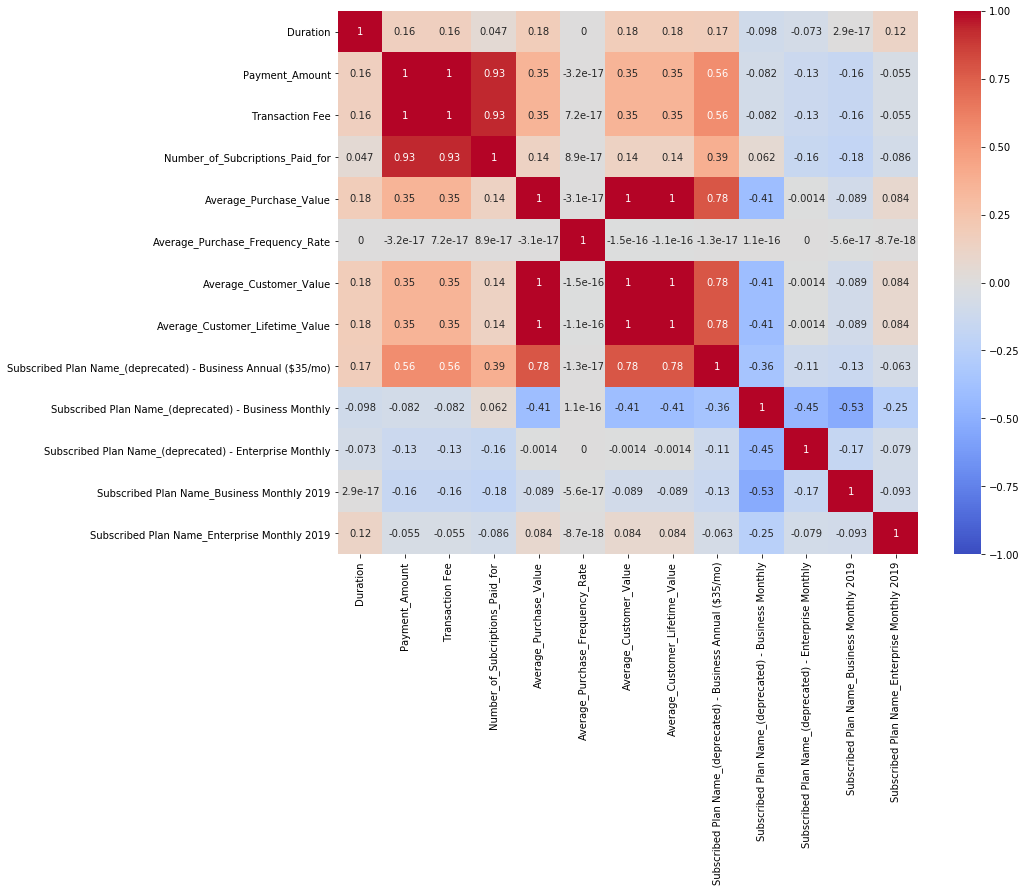

In [36]:

plt.figure(figsize=(13,10))
sns.heatmap(corr,
            vmin=-1,
            cmap='coolwarm',
            annot=True);

In [37]:
new_dummy_df.head()

,Duration,Plan_ID,Payment_Amount,Transaction Fee,Number_of_Subcriptions_Paid_for,Average_Purchase_Value,Average_Purchase_Frequency_Rate,Average_Customer_Value,Average_Customer_Lifetime_Value,Subscribed Plan Name_(deprecated) - Business Annual ($35/mo),Subscribed Plan Name_(deprecated) - Business Monthly,Subscribed Plan Name_(deprecated) - Enterprise Monthly,Subscribed Plan Name_Business Monthly 2019,Subscribed Plan Name_Enterprise Monthly 2019
0,9,ent_month,42,1.52,1,42.0,2.809524,118.000000,1180.000000,0,1,0,0,0
1,9,ent_month,42,1.52,1,42.0,2.809524,118.000000,1180.000000,0,1,0,0,0
2,9,ent_month,42,1.52,1,42.0,2.809524,118.000000,1180.000000,0,1,0,0,0
3,9,ent_2016_month,74,2.45,1,74.0,2.809524,207.904762,2079.047619,0,0,1,0,0
4,9,business_2019_month,59,2.01,1,59.0,2.809524,165.761905,1657.619048,0,0,0,1,0


In [39]:
#As the company want's to find out the correlation between subscription plans and Average Customer Lifetime Value
#-Let's take only subscription plans and average customer lifetime value
new_dummy_df_1=new_dummy_df.iloc[:, np.r_[8:14]]

In [40]:
new_dummy_df_1.rename(columns={'Average_Customer_Lifetime_Value': 'Customer Lifetime Value'}, inplace=True)

#df.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'}, inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [41]:
new_dummy_df_1.head()

,Customer Lifetime Value,Subscribed Plan Name_(deprecated) - Business Annual ($35/mo),Subscribed Plan Name_(deprecated) - Business Monthly,Subscribed Plan Name_(deprecated) - Enterprise Monthly,Subscribed Plan Name_Business Monthly 2019,Subscribed Plan Name_Enterprise Monthly 2019
0,1180.000000,0,1,0,0,0
1,1180.000000,0,1,0,0,0
2,1180.000000,0,1,0,0,0
3,2079.047619,0,0,1,0,0
4,1657.619048,0,0,0,1,0


In [42]:
new_dummy_df_1['Average Customer Lifetime Value']=new_dummy_df_1['Customer Lifetime Value']/21

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [91]:
new_dummy_df_1.head()

,Average Customer Lifetime Value,Subscribed Plan Name_(deprecated) - Business Annual ($35/mo),Subscribed Plan Name_(deprecated) - Business Monthly,Subscribed Plan Name_(deprecated) - Enterprise Monthly,Subscribed Plan Name_Business Monthly 2019,Subscribed Plan Name_Enterprise Monthly 2019
0,56.190476,0,1,0,0,0
1,56.190476,0,1,0,0,0
2,56.190476,0,1,0,0,0
3,99.002268,0,0,1,0,0
4,78.934240,0,0,0,1,0


In [1]:
# new_dummy_df_1=new_dummy_df_1.iloc[:, np.r_[6, 1, 2, 3, 4, 5]]

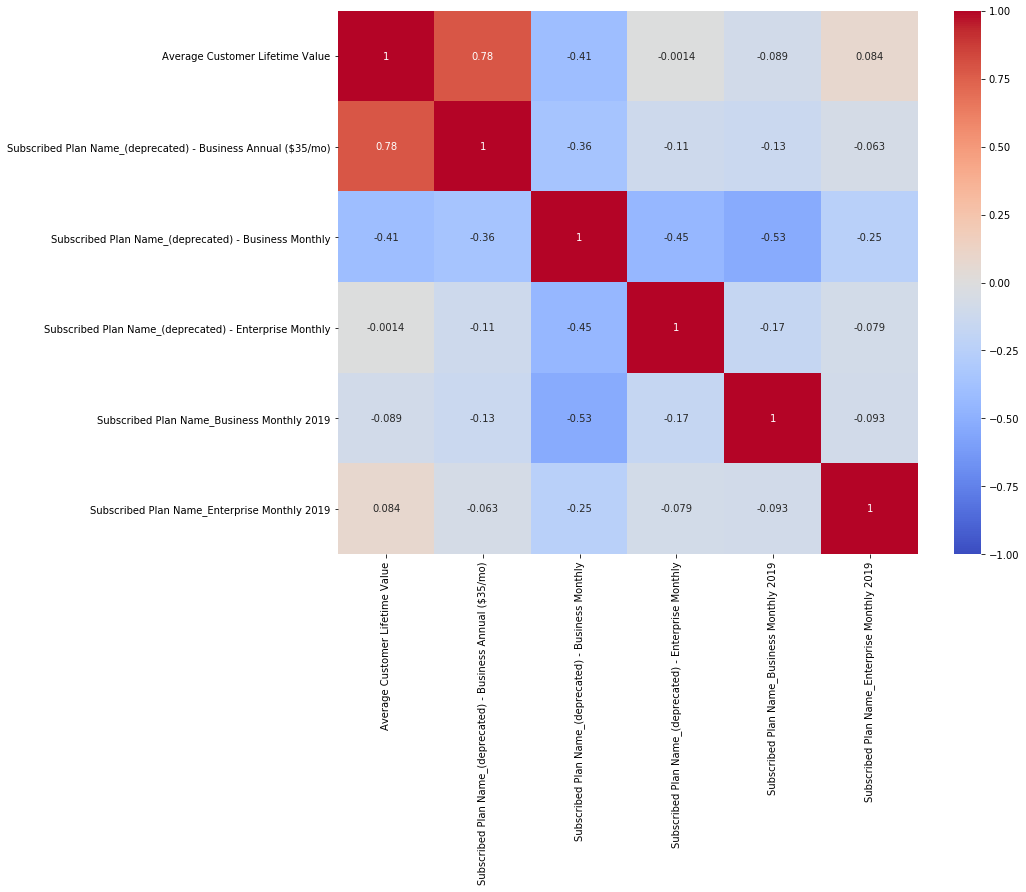

In [93]:
#Correlation of Subscription Plans and Average Customer Lifetime Value
corr=new_dummy_df_1.corr()
plt.figure(figsize=(13,10))
sns.heatmap(corr,
            vmin=-1,
            cmap='coolwarm',
            annot=True);

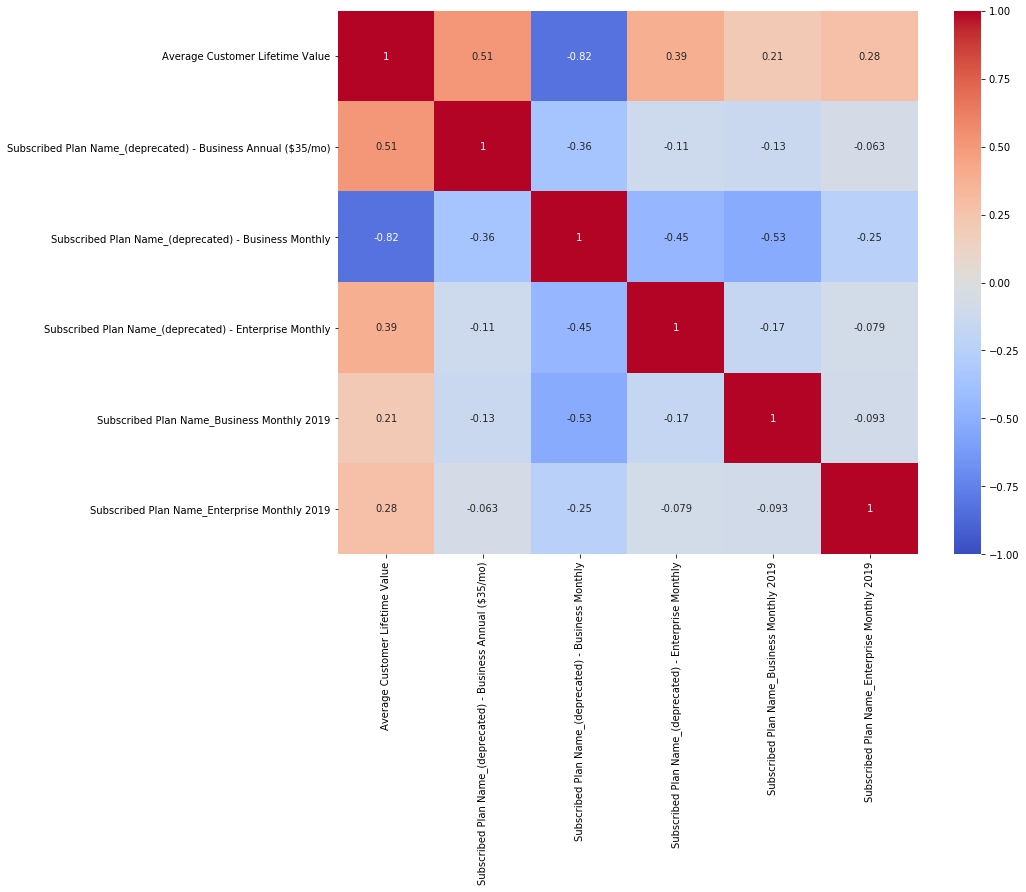

In [94]:
#Correlation of Subscription Plans and Average Customer Lifetime Value using spearman method
corr=new_dummy_df_1.corr(method='spearman')
plt.figure(figsize=(13,10))
sns.heatmap(corr,
            vmin=-1,
            cmap='coolwarm',
            annot=True);

In [95]:
from pandas.plotting import scatter_matrix

In [96]:
# import sys
# !{sys.executable} -m pip install pingouin

In [97]:
#correlation matrix using pingouin's r_corr() function:
    
#The only issue with the above plotted correlation matrix is that they do not return the p-values, 
#-but only the correlation coefficients. 
#Here again, Pingouin has a very convenient function (df.r_corr()) that will show a 
#-similar correlation matrix with the r-value on the lower triangle and p-value on the upper triangle

In [98]:
import pingouin as pg

In [99]:
new_dummy_df_1.rcorr(method='spearman',stars=False)

,Average Customer Lifetime Value,Subscribed Plan Name_(deprecated) - Business Annual ($35/mo),Subscribed Plan Name_(deprecated) - Business Monthly,Subscribed Plan Name_(deprecated) - Enterprise Monthly,Subscribed Plan Name_Business Monthly 2019,Subscribed Plan Name_Enterprise Monthly 2019
Average Customer Lifetime Value,-,0.010,0.000,0.061,0.32,0.185
Subscribed Plan Name_(deprecated) - Business Annual ($35/mo),0.512,-,0.087,0.596,0.53,0.770
Subscribed Plan Name_(deprecated) - Business Monthly,-0.822,-0.357,-,0.028,0.008,0.245
Subscribed Plan Name_(deprecated) - Enterprise Monthly,0.388,-0.114,-0.447,-,0.43,0.714
Subscribed Plan Name_Business Monthly 2019,0.212,-0.135,-0.529,-0.169,-,0.665
Subscribed Plan Name_Enterprise Monthly 2019,0.28,-0.063,-0.247,-0.079,-0.093,-


In [100]:
#In the above correlation matrices I have done one hot encoding and then passed the values in correlation fundtion. 
#are those the right approaches? These are the only way we can find correlation right?

#In my research, I got to knwo that spearman correlation and Point biserial Correlation is a method to find 
#-correlation between continuos and categorical variables

#the normal corr() and corr(method="spearman") gave me different results

#I am confused now which method I should suggest them? with what supportive output?

In [101]:
new_dummy_df_1.head(3)

,Average Customer Lifetime Value,Subscribed Plan Name_(deprecated) - Business Annual ($35/mo),Subscribed Plan Name_(deprecated) - Business Monthly,Subscribed Plan Name_(deprecated) - Enterprise Monthly,Subscribed Plan Name_Business Monthly 2019,Subscribed Plan Name_Enterprise Monthly 2019
0,56.190476,0,1,0,0,0
1,56.190476,0,1,0,0,0
2,56.190476,0,1,0,0,0


In [102]:
x=new_dummy_df_1.iloc[:, 0]

In [103]:
y=new_dummy_df_1.iloc[:, 1]

In [104]:
new_dummy_df_1.columns[1]

'Subscribed Plan Name_(deprecated) - Business Annual ($35/mo)'

In [105]:
import scipy.stats as stats

y= new_dummy_df_1.iloc[:,0]
for i in range(1,6):
    x= new_dummy_df_1.iloc[:,i]
    #calculate point-biserial correlation
    print('\n')
    print('correlation of plan'+ " " + new_dummy_df_1.columns[i] + ": \n" + str(stats.pointbiserialr(x, y)))



correlation of plan Subscribed Plan Name_(deprecated) - Business Annual ($35/mo): 
PointbiserialrResult(correlation=0.784921316291993, pvalue=5.580537946012875e-06)


correlation of plan Subscribed Plan Name_(deprecated) - Business Monthly: 
PointbiserialrResult(correlation=-0.4054808287563039, pvalue=0.04932446181646827)


correlation of plan Subscribed Plan Name_(deprecated) - Enterprise Monthly: 
PointbiserialrResult(correlation=-0.0014091954665982256, pvalue=0.9947858166899232)


correlation of plan Subscribed Plan Name_Business Monthly 2019: 
PointbiserialrResult(correlation=-0.08934547683750287, pvalue=0.6780192468721367)


correlation of plan Subscribed Plan Name_Enterprise Monthly 2019: 
PointbiserialrResult(correlation=0.08370816484400075, pvalue=0.6973675332266177)


In [175]:
bmdf=pd.read_excel(r'/Users/arvindpawar/Desktop/Survival Analysis/Badger Maps Data.xlsx')

In [176]:
bmdf.head()

,Date/Time,Subscription_Date,Today's_Date,Email,Subscribed Plan Name,Plan ID,Payment Amount,Transaction Fee,Number of Subcriptions Paid for
0,2019-10-15 16:46:10 +0000,2019-10-15,2020-08-04,kmarron@booksellers.com,(deprecated) - Business Monthly,ent_month,42,1.52,1
1,2019-10-17 16:46:08 +0000,2019-10-17,2020-08-04,mckinney@meddev.com,(deprecated) - Business Monthly,ent_month,42,1.52,1
2,2019-10-20 16:46:08 +0000,2019-10-20,2020-08-04,laura.leyland@gmail.com,(deprecated) - Business Monthly,ent_month,42,1.52,1
3,2019-10-21 16:46:08 +0000,2019-10-21,2020-08-04,it@cahredt.com,(deprecated) - Enterprise Monthly,ent_2016_month,74,2.45,1
4,2019-10-25 15:10:10 +0000,2019-10-25,2020-08-04,John@somecompany.com,Business Monthly 2019,business_2019_month,59,2.01,1


In [177]:
#calculate unit price
bmdf['unitprice']=bmdf['Payment Amount']/bmdf['Number of Subcriptions Paid for']

In [178]:
bmdf=bmdf[['Email','Subscription_Date','Number of Subcriptions Paid for','Payment Amount', 'Subscribed Plan Name']]

In [179]:
bmdf.head()

,Email,Subscription_Date,Number of Subcriptions Paid for,Payment Amount,Subscribed Plan Name
0,kmarron@booksellers.com,2019-10-15,1,42,(deprecated) - Business Monthly
1,mckinney@meddev.com,2019-10-17,1,42,(deprecated) - Business Monthly
2,laura.leyland@gmail.com,2019-10-20,1,42,(deprecated) - Business Monthly
3,it@cahredt.com,2019-10-21,1,74,(deprecated) - Enterprise Monthly
4,John@somecompany.com,2019-10-25,1,59,Business Monthly 2019


In [180]:
import datetime as dt
PRESENT = dt.datetime(2020,8,4)

In [181]:
newbmdf=bmdf.groupby('Email').agg({'Subscription_Date': lambda date: (PRESENT - date.max()).days/30,
                                        'Email': lambda num: len(num),
                                        'Number of Subcriptions Paid for': lambda quant: quant.sum(),
                                        'Payment Amount': lambda price: price.sum()})

In [182]:
#calculate unit price
newbmdf['unitprice']=round(newbmdf['Payment Amount']/newbmdf['Number of Subcriptions Paid for'], 2)

In [183]:
newbmdf['Subscription_Date']=round(newbmdf['Subscription_Date'], 3)

In [184]:
newbmdf

,Subscription_Date,Email,Number of Subcriptions Paid for,Payment Amount,unitprice
Email,,,,,
Andrew@aboard.com,9.300,1,1,105,105.00
BlossomTex@gmail.com,9.167,1,1,42,42.00
David.Blanco@worldwide.com,8.433,1,1,74,74.00
John@somecompany.com,9.467,1,1,59,59.00
RJkawasaki@aol.com,8.833,1,1,42,42.00
Schmidt@tractor.com,9.467,2,26,3300,126.92
SirElton@sikorsky.com,8.300,2,2,84,42.00
Wormley@paper.com,9.133,1,1,42,42.00
daveweird@me.com,8.933,1,1,42,42.00


In [185]:
newbmdf.columns=['numberOfMonths','Frequnecy','numberOfSubscription','MoneySpent', 'unit_price']

In [186]:
newbmdf['Average_Purchase_Value']=round(newbmdf['unit_price'], 0)

In [187]:
newbmdf=newbmdf.drop(['unit_price'], axis=1)

In [188]:
totalSubs=newbmdf['numberOfSubscription'].sum()

In [189]:
noOfCust=newbmdf['Frequnecy'].count()

In [190]:
round(totalSubs/noOfCust, 2)

2.81

In [191]:
newbmdf['Average_subscription_purchase_rate']=round(totalSubs/noOfCust, 2)

In [192]:
newbmdf['Customer_Value']=newbmdf['Average_Purchase_Value']*newbmdf['Average_subscription_purchase_rate']

In [193]:
newbmdf.head()

,numberOfMonths,Frequnecy,numberOfSubscription,MoneySpent,Average_Purchase_Value,Average_subscription_purchase_rate,Customer_Value
Email,,,,,,,
Andrew@aboard.com,9.300,1,1,105,105.0,2.81,295.05
BlossomTex@gmail.com,9.167,1,1,42,42.0,2.81,118.02
David.Blanco@worldwide.com,8.433,1,1,74,74.0,2.81,207.94
John@somecompany.com,9.467,1,1,59,59.0,2.81,165.79
RJkawasaki@aol.com,8.833,1,1,42,42.0,2.81,118.02


In [194]:
custlifespan=newbmdf['numberOfMonths'].sum()

In [195]:
custlifespan

192.699

In [196]:
newbmdf['Average_Cust_Lifetime_Span']=custlifespan/21

In [197]:
newbmdf.head()

,numberOfMonths,Frequnecy,numberOfSubscription,MoneySpent,Average_Purchase_Value,Average_subscription_purchase_rate,Customer_Value,Average_Cust_Lifetime_Span
Email,,,,,,,,
Andrew@aboard.com,9.300,1,1,105,105.0,2.81,295.05,9.176143
BlossomTex@gmail.com,9.167,1,1,42,42.0,2.81,118.02,9.176143
David.Blanco@worldwide.com,8.433,1,1,74,74.0,2.81,207.94,9.176143
John@somecompany.com,9.467,1,1,59,59.0,2.81,165.79,9.176143
RJkawasaki@aol.com,8.833,1,1,42,42.0,2.81,118.02,9.176143


In [198]:
newbmdf['Customer_lifetime_Value']=newbmdf['Average_Cust_Lifetime_Span']*newbmdf['Customer_Value']

In [199]:
newbmdf['Average_Customer_Lifetime_Value']=newbmdf['Customer_lifetime_Value']/21

In [200]:
newbmdf

,numberOfMonths,Frequnecy,numberOfSubscription,MoneySpent,Average_Purchase_Value,Average_subscription_purchase_rate,Customer_Value,Average_Cust_Lifetime_Span,Customer_lifetime_Value,Average_Customer_Lifetime_Value
Email,,,,,,,,,,
Andrew@aboard.com,9.300,1,1,105,105.0,2.81,295.05,9.176143,2707.420950,128.924807
BlossomTex@gmail.com,9.167,1,1,42,42.0,2.81,118.02,9.176143,1082.968380,51.569923
David.Blanco@worldwide.com,8.433,1,1,74,74.0,2.81,207.94,9.176143,1908.087146,90.861293
John@somecompany.com,9.467,1,1,59,59.0,2.81,165.79,9.176143,1521.312724,72.443463
RJkawasaki@aol.com,8.833,1,1,42,42.0,2.81,118.02,9.176143,1082.968380,51.569923
Schmidt@tractor.com,9.467,2,26,3300,127.0,2.81,356.87,9.176143,3274.690101,155.937624
SirElton@sikorsky.com,8.300,2,2,84,42.0,2.81,118.02,9.176143,1082.968380,51.569923
Wormley@paper.com,9.133,1,1,42,42.0,2.81,118.02,9.176143,1082.968380,51.569923
daveweird@me.com,8.933,1,1,42,42.0,2.81,118.02,9.176143,1082.968380,51.569923


In [202]:
newbmdf=newbmdf.reset_index()

In [212]:
newbmdf.head()

,Email,numberOfMonths,Frequnecy,numberOfSubscription,MoneySpent,Average_Purchase_Value,Average_subscription_purchase_rate,Customer_Value,Average_Cust_Lifetime_Span,Customer_lifetime_Value,Average_Customer_Lifetime_Value
0,Andrew@aboard.com,9.300,1,1,105,105.0,2.81,295.05,9.176143,2707.420950,128.924807
1,BlossomTex@gmail.com,9.167,1,1,42,42.0,2.81,118.02,9.176143,1082.968380,51.569923
2,David.Blanco@worldwide.com,8.433,1,1,74,74.0,2.81,207.94,9.176143,1908.087146,90.861293
3,John@somecompany.com,9.467,1,1,59,59.0,2.81,165.79,9.176143,1521.312724,72.443463
4,RJkawasaki@aol.com,8.833,1,1,42,42.0,2.81,118.02,9.176143,1082.968380,51.569923


In [206]:
bmdf.head()

,Email,Subscription_Date,Number of Subcriptions Paid for,Payment Amount,Subscribed Plan Name
0,kmarron@booksellers.com,2019-10-15,1,42,(deprecated) - Business Monthly
1,mckinney@meddev.com,2019-10-17,1,42,(deprecated) - Business Monthly
2,laura.leyland@gmail.com,2019-10-20,1,42,(deprecated) - Business Monthly
3,it@cahredt.com,2019-10-21,1,74,(deprecated) - Enterprise Monthly
4,John@somecompany.com,2019-10-25,1,59,Business Monthly 2019


In [207]:
bmdf=bmdf.drop_duplicates(subset ="Email")

In [210]:
bmdf.shape

(21, 5)

In [214]:
joindata=newbmdf.merge(bmdf, 
                       left_on = 'Email',
                       right_on = 'Email',
                       how = 'left')

In [215]:
joindata.head()

,Email,numberOfMonths,Frequnecy,numberOfSubscription,MoneySpent,Average_Purchase_Value,Average_subscription_purchase_rate,Customer_Value,Average_Cust_Lifetime_Span,Customer_lifetime_Value,Average_Customer_Lifetime_Value,Subscription_Date,Number of Subcriptions Paid for,Payment Amount,Subscribed Plan Name
0,Andrew@aboard.com,9.300,1,1,105,105.0,2.81,295.05,9.176143,2707.420950,128.924807,2019-10-30,1,105,Enterprise Monthly 2019
1,BlossomTex@gmail.com,9.167,1,1,42,42.0,2.81,118.02,9.176143,1082.968380,51.569923,2019-11-03,1,42,(deprecated) - Business Monthly
2,David.Blanco@worldwide.com,8.433,1,1,74,74.0,2.81,207.94,9.176143,1908.087146,90.861293,2019-11-25,1,74,(deprecated) - Enterprise Monthly
3,John@somecompany.com,9.467,1,1,59,59.0,2.81,165.79,9.176143,1521.312724,72.443463,2019-10-25,1,59,Business Monthly 2019
4,RJkawasaki@aol.com,8.833,1,1,42,42.0,2.81,118.02,9.176143,1082.968380,51.569923,2019-11-13,1,42,(deprecated) - Business Monthly


In [221]:
transformed_data=joindata.iloc[:, np.r_[1:11, 14]]

In [222]:
transformed_data=pd.get_dummies(transformed_data,columns=['Subscribed Plan Name'])

In [227]:


transformed_data=transformed_data.drop(['Average_Cust_Lifetime_Span','Average_subscription_purchase_rate' ], axis=1)

In [228]:
corr=transformed_data.corr(method='spearman')

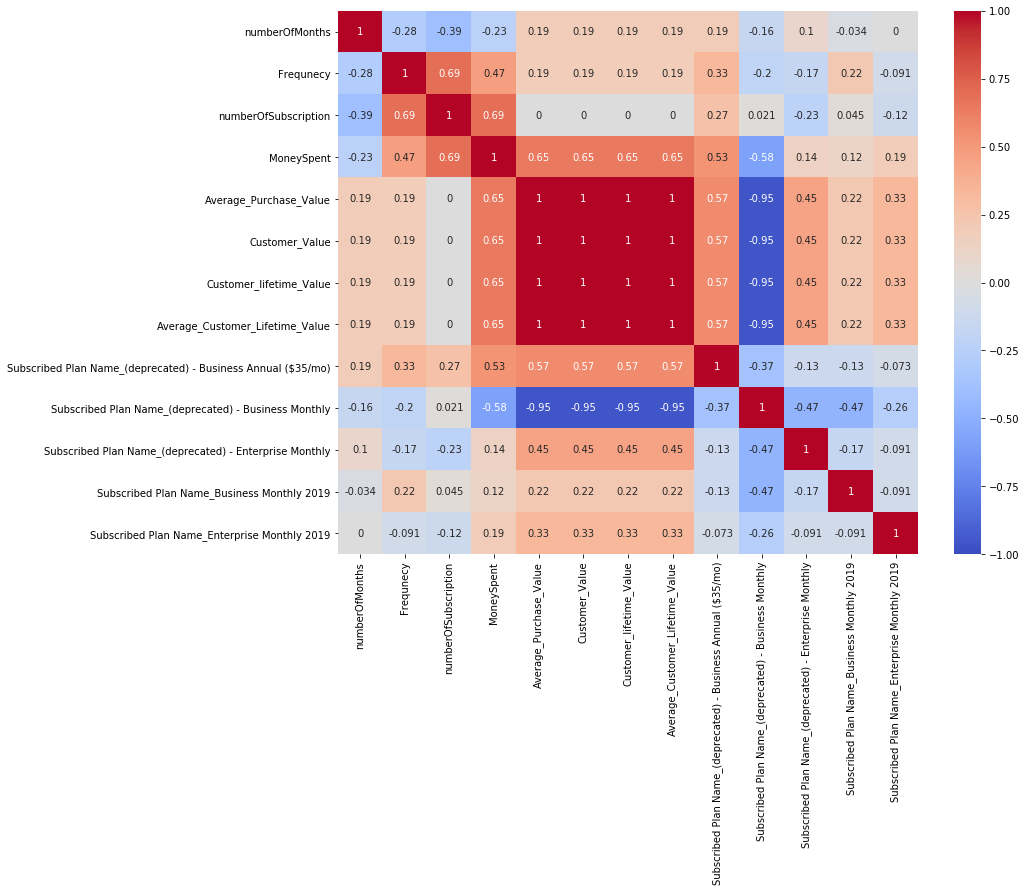

In [229]:
plt.figure(figsize=(13,10))
sns.heatmap(corr,
            vmin=-1,
            cmap='coolwarm',
            annot=True);